# FX Parameters estimation
### April 2022

In [1]:
import sys
sys.path.append("../regressors")
import regressor as reg
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
DATA_PATH = '/home/alexandre/dataset/'

In [3]:
data = pd.read_csv(DATA_PATH + "distortion_param.csv", index_col=0)
target = data['fx_setting_1']
data = data.drop(columns=["fx_type", "fx_setting_1"])

In [4]:
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.33)

In [5]:
sgd = reg.Regressor('sgd')
sgd.fit(X_train, y_train)

In [6]:
y_pred = sgd.predict(X_test)

In [7]:
dist = reg.Regressor.distance(y_pred, y_test, method='l2', pairwise=True)
dist = dist.to_numpy()

In [8]:
dist_sorted = []
for i in range(10, 41):
    tmp = dist[y_test == i]
    dist_sorted.append(tmp)

In [9]:
dist_sorted_sgd = np.array(dist_sorted)

/tmp/ipykernel_80505/966554942.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  dist_sorted_sgd = np.array(dist_sorted)


<IPython.core.display.Javascript object>


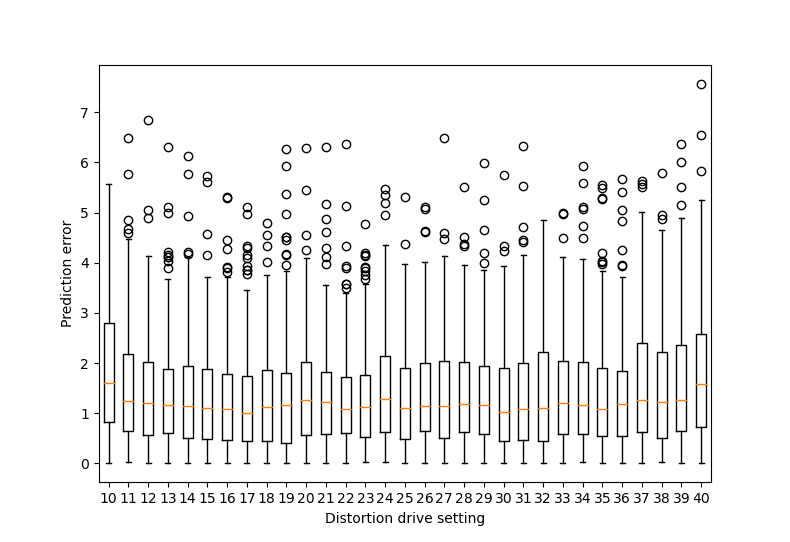

In [10]:
%matplotlib notebook
plt.figure(1)
plt.boxplot(dist_sorted_sgd, labels=np.arange(10, 41, 1))
plt.ylabel("Prediction error")
plt.xlabel("Distortion drive setting")
plt.show()

In [11]:
svr = reg.Regressor('svr')
svr.fit(X_train, y_train)

In [12]:
y_pred = svr.predict(X_test)

In [13]:
dist = reg.Regressor.distance(y_pred, y_test, method='l2', pairwise=True)
dist = dist.to_numpy()

In [14]:
dist_sorted = []
for i in range(10, 41):
    tmp = dist[y_test == i]
    dist_sorted.append(tmp)

In [15]:
dist_sorted_svr = np.array(dist_sorted)

/tmp/ipykernel_80505/1627544256.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  dist_sorted_svr = np.array(dist_sorted)


<IPython.core.display.Javascript object>


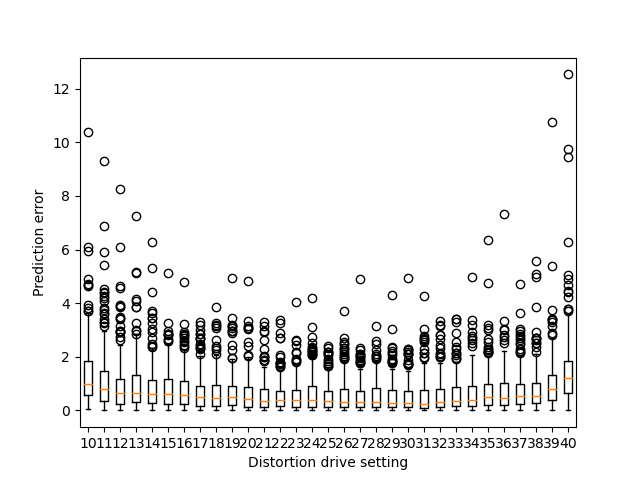

In [16]:
%matplotlib notebook
plt.figure(2)
plt.boxplot(dist_sorted_svr, labels=np.arange(10, 41, 1))
plt.ylabel("Prediction error")
plt.xlabel("Distortion drive setting")
plt.show()

<IPython.core.display.Javascript object>


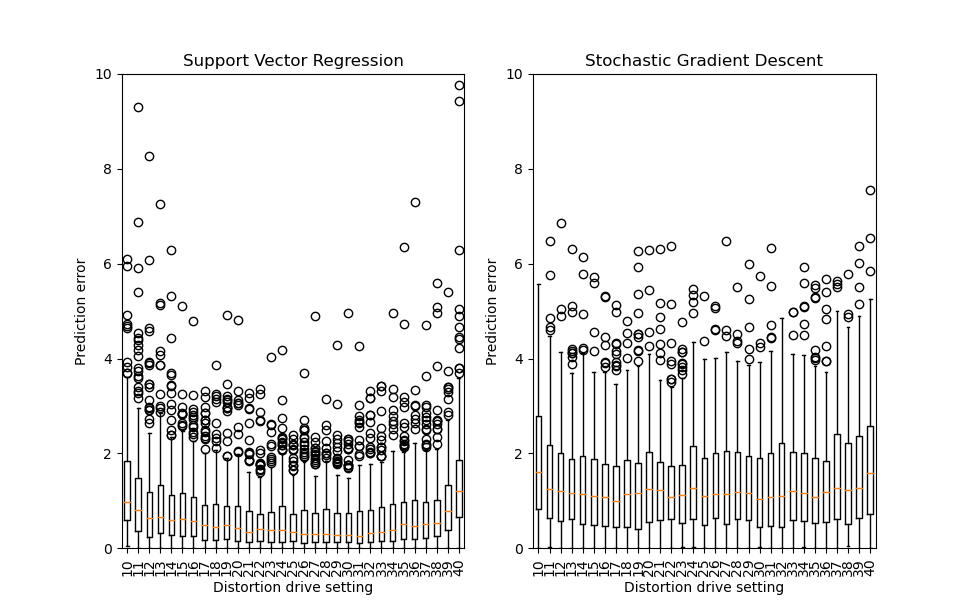

In [17]:
fig, axs = plt.subplots(1, 2)
axs[0].boxplot(dist_sorted_svr, labels=np.arange(10, 41, 1))
axs[0].set_title("Support Vector Regression")
axs[0].set_ylim(0, 10)
axs[0].set_ylabel("Prediction error")
axs[0].set_xlabel("Distortion drive setting")
axs[0].tick_params('x', labelrotation=90)
axs[1].boxplot(dist_sorted_sgd, labels=np.arange(10, 41, 1))
axs[1].set_ylim(0, 10)
axs[1].set_title("Stochastic Gradient Descent")
axs[1].set_ylabel("Prediction error")
axs[1].set_xlabel("Distortion drive setting")
axs[1].tick_params('x', labelrotation=90)
fig.show()